<a href="https://colab.research.google.com/github/miriampaul/AnalysisPandasProfilingEDA/blob/main/Kaggle_Bike_Demand_Predictions_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PREDICT THE DEMAND FOR BIKES**
Capital Bikeshares available around Metro DC area ,Predict how many Bikes will be required on an hourly basis. Take the datasets from UCI Bike Sharing.


In [9]:
import pyspark
import pandas as pd

In [10]:
dataset=pd.read_csv("/hour.csv")

In [11]:
dataset.columns

Index(['index', 'date', 'season', 'year', 'month', 'hour', 'holiday',
       'weekday', 'workingday', 'weather', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'demand'],
      dtype='object')

In [12]:
dataset.head()

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Steps To solve the bike sharing prediction problem
1. Read the data
2. Preliminary analysis of the data and drop obvious features
3. Visualize the data
4. Check Multiple Linear Regression Assumptions- Normality , Linear Correlation, Multicollinearity, Autocorrelation, Sample size
5. Drop irrelevant features
6. Create/Modify more features
7. Create Dummy variables
8. Train and Test split
9. Fit and score the model
10. Present the results





In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [14]:
#STEP 1 - Read the data
bikes=pd.read_csv("/content/hour.csv")
bikes

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,31-12-2012,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,31-12-2012,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,31-12-2012,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,31-12-2012,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [15]:
#STEP 2- Prelim Analysis and Feature Selection

bikes_prep=bikes.copy()

In [16]:
bikes_prep=bikes_prep.drop(['index','date','casual','registered'],axis=1)

In [17]:
bikes_prep

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [18]:
#BASIC ANALYSIS OF THE DATA

In [19]:
#Basic checks of missing values
bikes_prep.isnull().sum()

,0
season,0
year,0
month,0
hour,0
holiday,0
weekday,0
workingday,0
weather,0
temp,0
atemp,0


In [20]:
#Visualizate the Data using Pandas histogram

array([[<Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'hour'}>],
       [<Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'demand'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

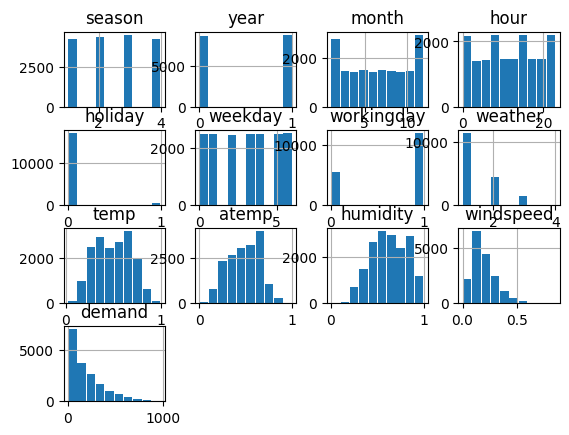

In [21]:
bikes_prep.hist(rwidth=0.9)

array([[<Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'hour'}>],
       [<Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'demand'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

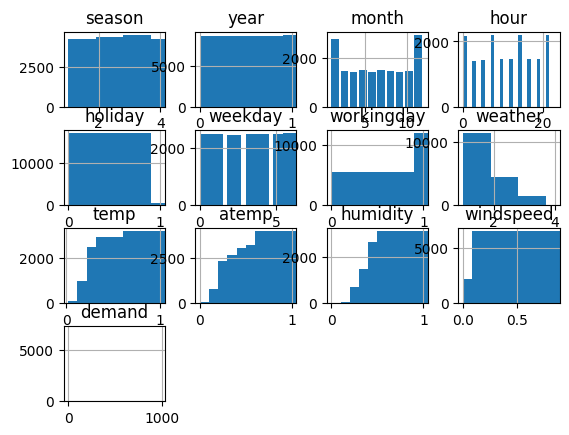

In [22]:
bikes_prep.hist(width=0.9)

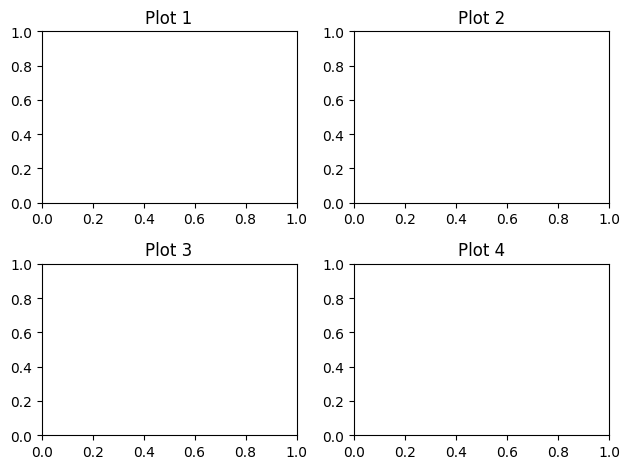

In [23]:
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(2, 2)

# Add titles to subplots
axes[0, 0].set_title("Plot 1")
axes[0, 1].set_title("Plot 2")
axes[1, 0].set_title("Plot 3")
axes[1, 1].set_title("Plot 4")

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


In [24]:
#PREDICTED VARIABLE IS NOT NORMALY DISTRIBUTED

In [25]:
bikes_prep

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [26]:
#STEP 3 Data Visualization
#VISUALIZE THE CONTINUOUS FEATURES VS DEMAND


<Axes: >

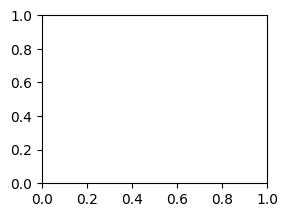

In [32]:
plt.subplot(2,2,1)

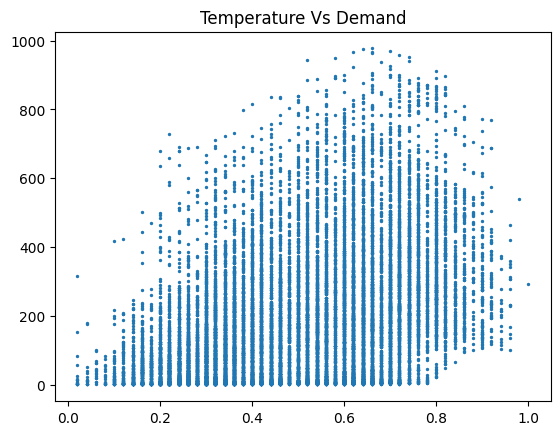

In [35]:
plt.title('Temperature Vs Demand')
plt.scatter(bikes_prep['temp'], bikes_prep['demand'],s=2)

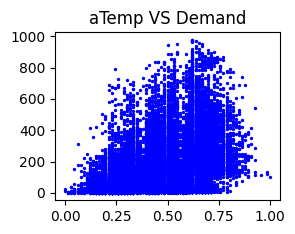

In [37]:
plt.subplot(2,2,2)
plt.title('aTemp VS Demand')
plt.scatter(bikes_prep['atemp'], bikes_prep['demand'], s=2, c='b')

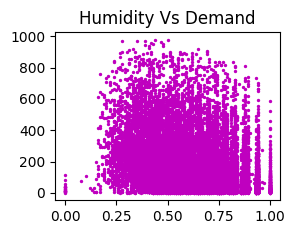

In [38]:
plt.subplot(2,2,3)
plt.title('Humidity Vs Demand')
plt.scatter(bikes_prep['humidity'], bikes_prep['demand'],s=2, c='m')

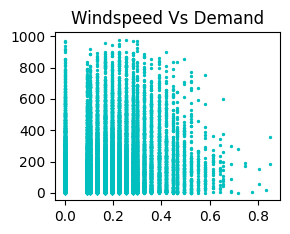

In [39]:
plt.subplot(2,2,4)
plt.title('Windspeed Vs Demand')
plt.scatter(bikes_prep['windspeed'],bikes_prep['demand'],s=2, c='c')

In [40]:
plt.tight.layout()

AttributeError: module 'matplotlib.pyplot' has no attribute 'tight'

Text(0.5, 1.0, 'Average demand per season')

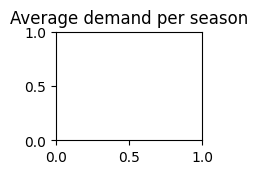

In [50]:
#plot the categorical features vs demand
#Create a 3*3 Subplot
plt.subplot(3,3,1)
plt.title('Average demand per season')

In [51]:
#Create unique seasons values
cat_list=bikes_prep['season'].unique()
cat_list

array([1, 2, 3, 4])

In [52]:
#Create average demand per season using group by
cat_average=bikes_prep.groupby('season').mean()['demand']
cat_average

,demand
season,
1,111.114569
2,208.344069
3,236.016237
4,198.868856


In [55]:
colours=['g','r','m','b']

<BarContainer object of 4 artists>

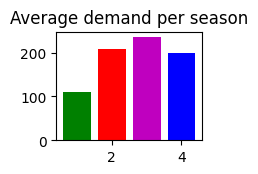

In [56]:
#Create a 3*3 Subplot
plt.subplot(3,3,1)
plt.title('Average demand per season')
plt.bar(cat_list, cat_average, color=colours)